# READ DATASET total.csv

{'Média': 33.3121652930229, 'Mediana': 27.0, 'Modo': 26.0, 'std_dev': 25.68600382734764, 'Percentagens': 0.25    23.0
0.50    27.0
0.75    34.0
Name: URLLength, dtype: float64}


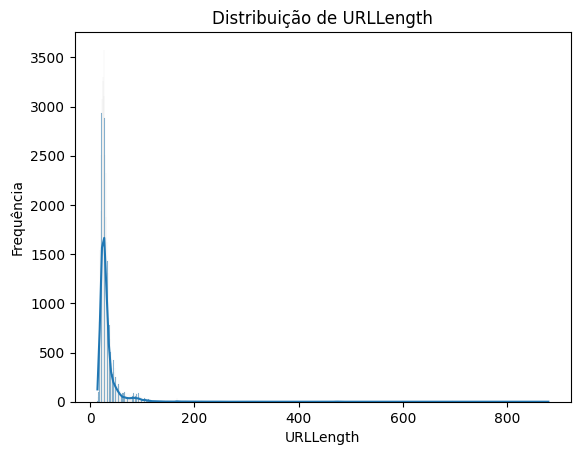

In [98]:
#estatistica
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os


data_url = 'Datasets/total.csv'

# Read the dataset using pandas
df = pd.read_csv(data_url, delimiter=';', header=0, encoding='utf-8')


def etatisticas_descritivas(data, column):
    media = data[column].mean()
    mediana = data[column].median()
    modo = data[column].mode()[0] if not data[column].mode().empty else 'N/A'
    std_dev = data[column].std()
    percentagens = data[column].quantile([0.25, 0.5, 0.75])

    return {
        "Média": media,
        "Mediana": mediana,
        "Modo": modo,
        "std_dev": std_dev,
        "Percentagens": percentagens
    }

stats = etatisticas_descritivas(df, 'URLLength')
print(stats)

def distribuicao_variavel(data, column):
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribuição de {column}")
    plt.xlabel(column)
    plt.ylabel("Frequência")
    plt.show()

distribuicao_variavel(df, 'URLLength')

# Remoção de colunas sem relevância e linhas em que o IP não se encontra preenchido

In [99]:
data_url = 'Datasets/total.csv'

# Read the dataset using pandas
df = pd.read_csv(data_url, delimiter=';', header=0, encoding='utf-8', low_memory=False)

# Adicionar uma coluna de ID única
df['ID'] = range(1, len(df) + 1)

# Verificar se a coluna 'IP' está presente
if 'IP' in df.columns:
    # Detectar registros onde o IP está nulo
    ips_nao_encontrados = df[df['IP'].isnull() | (df['IP'] == '')]

    # Contar o número de linhas com IPs não encontrados
    num_ips_nao_encontrados = len(ips_nao_encontrados)
    ids_ips_nao_encontrados = ips_nao_encontrados['ID'].tolist()

    # Exibir a contagem
    print("Número de registos com IPs não encontrados:")
    print(num_ips_nao_encontrados)
    print("Lista de Id's dos registos sem Ip's encontrados")
    print(ids_ips_nao_encontrados)
else:
    print("A coluna 'IP' não está presente no DataFrame.")

df['Postal'].fillna('ind', inplace=True)
df['Latitude'].fillna('ind', inplace=True)
df['Longitude'].fillna('ind', inplace=True)


Número de registos com IPs não encontrados:
17180
Lista de Id's dos registos sem Ip's encontrados
[22, 28, 30, 32, 33, 35, 41, 42, 45, 46, 51, 53, 55, 58, 60, 61, 74, 78, 81, 83, 88, 92, 101, 102, 105, 109, 110, 115, 121, 122, 126, 127, 139, 145, 148, 150, 152, 159, 162, 166, 168, 186, 194, 199, 212, 213, 217, 233, 234, 237, 243, 244, 246, 247, 248, 250, 257, 263, 267, 271, 276, 278, 285, 287, 288, 292, 296, 299, 300, 307, 308, 312, 313, 315, 316, 319, 320, 330, 334, 335, 337, 346, 352, 353, 357, 361, 363, 366, 369, 371, 374, 376, 377, 378, 379, 382, 388, 389, 395, 401, 402, 403, 413, 415, 416, 421, 422, 424, 425, 428, 432, 434, 443, 444, 445, 450, 453, 456, 459, 461, 463, 467, 470, 475, 478, 480, 481, 484, 485, 487, 493, 494, 495, 498, 499, 507, 512, 514, 516, 522, 523, 526, 529, 533, 535, 538, 542, 559, 561, 566, 570, 575, 576, 581, 583, 593, 601, 606, 608, 618, 622, 623, 629, 630, 639, 643, 644, 646, 653, 655, 675, 682, 687, 692, 695, 707, 708, 710, 724, 736, 738, 741, 746, 749, 750

C:\Users\ricar\AppData\Local\Temp\ipykernel_18672\1537239257.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal'].fillna('ind', inplace=True)
C:\Users\ricar\AppData\Local\Temp\ipykernel_18672\1537239257.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

# Criação de string "noIP" para linhas sem IP 

In [100]:
df.loc[df['ID'].isin(ids_ips_nao_encontrados), 'IP'] = 'noIP'

print(df["IP"].head(25))

0     142.93.145.212
1      134.93.178.47
2      3.160.132.110
3     104.18.124.114
4      45.167.121.53
5      104.22.46.216
6       172.67.68.10
7     152.199.21.175
8     104.211.74.196
9      184.154.38.11
10      167.233.3.76
11     91.239.200.44
12    35.188.144.184
13       52.23.51.78
14       78.128.79.7
15    173.255.253.22
16     185.53.178.54
17      68.183.64.12
18      23.227.38.74
19     103.86.177.98
20      141.8.197.42
21              noIP
22      172.67.72.98
23     185.103.37.75
24    45.223.167.195
Name: IP, dtype: object


# Verificar se há linhas duplicadas

In [101]:
duplicatas = df[df.duplicated()]

# Contar o número de linhas duplicadas
num_duplicatas = len(duplicatas)

# Exibir a contagem
print("Número de linhas duplicadas:")
print(num_duplicatas)

# Exibir as linhas duplicadas
if num_duplicatas > 0:
    print("Linhas duplicadas:")
    print(duplicatas)
else:
    print("Não há linhas duplicadas no DataFrame.")

Número de linhas duplicadas:
0
Não há linhas duplicadas no DataFrame.


# Transformação de variáveis categóricas em valores

In [102]:
label_encoder = LabelEncoder()

# Lista de colunas categóricas
categorical_columns = ['TLD', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'IP', 'DNS', 'Reverse DNS', 'City', 'Region', 'Country', 'Org', 'Timezone', 'Hostname','Latitude','Longitude']

# Aplicar o LabelEncoder em cada coluna categórica
for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

# Verificar as primeiras linhas do DataFrame
print(df)

                                                  URL  URLLength  \
0                    https://www.southbankmosaics.com       31.0   
1                            https://www.uni-mainz.de       23.0   
2                      https://www.voicefmradio.co.uk       29.0   
3                         https://www.sfnmjournal.com       26.0   
4                  https://www.rewildingargentina.org       33.0   
...                                               ...        ...   
52661                   https://www.cclpworldwide.com       28.0   
52662  https://cool-bush-57b9.kosaci4411.workers.dev/       46.0   
52663                            http://www.jerode.cf       19.0   
52664                       http://www.rajhibuild.com       25.0   
52665                         https://www.motivity.ru       22.0   

                                      Domain  DomainLength  IsDomainIP  TLD  \
0                   www.southbankmosaics.com          24.0         0.0  131   
1                        

# Remoção de colunas menos importantes

In [103]:
less_important_columns = [
    'URL', 'Title', 'Robots', 'Hostname', 'Domain','DNS', 'Reverse DNS'
]

# Remover colunas menos importantes
df= df.drop(columns=less_important_columns)

# Verificar as primeiras linhas do DataFrame filtrado
print(df.head())

   URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
0       31.0          24.0         0.0  131               100.0   
1       23.0          16.0         0.0  148               100.0   
2       29.0          22.0         0.0  426               100.0   
3       26.0          19.0         0.0  131               100.0   
4       33.0          26.0         0.0  330               100.0   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0              1.000000           0.522907     0.061933        3.0   
1              0.666667           0.032650     0.050207        2.0   
2              0.866667           0.028555     0.064129        2.0   
3              1.000000           0.522907     0.057606        3.0   
4              1.000000           0.079963     0.059441        3.0   

   NoOfSubDomain  ...  n_dns  City  Region  Country   Org    Postal  Timezone  \
0            1.0  ...    0.0  1430     342       20   329       M5A        55   
1            1

# Outliers

In [104]:
numeric_columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 
    'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 
    'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 
    'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 
    'LineOfCode', 'LargestLineLength', 'NoOfPopup', 'NoOfiFrame', 'NoOfURLRedirect', 
    'NoOfSelfRedirect', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
    'NoOfEmptyRef', 'NoOfExternalRef'
]

# Função para identificar outliers com IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar e exibir outliers para cada coluna numérica
for column in numeric_columns:
    if column in df.columns:
        outliers = find_outliers_iqr(df, column)
        num_outliers = len(outliers)
        print(f"Coluna: {column}")
        print(f"Número de outliers: {num_outliers}")
        if num_outliers > 0:
            print(outliers[['ID', column]])
        print("\n")

Coluna: URLLength
Número de outliers: 4767
          ID  URLLength
31        32       91.0
45        46      140.0
77        78       92.0
83        84       51.0
91        92       64.0
...      ...        ...
52644  52645       74.0
52646  52647      103.0
52651  52652       88.0
52655  52656       88.0
52657  52658       71.0

[4767 rows x 2 columns]


Coluna: DomainLength
Número de outliers: 2933
          ID  DomainLength
83        84          45.0
92        93          47.0
100      101          46.0
104      105          37.0
108      109          39.0
...      ...           ...
52644  52645          59.0
52646  52647          71.0
52655  52656          79.0
52657  52658          48.0
52662  52663          37.0

[2933 rows x 2 columns]


Coluna: URLSimilarityIndex
Número de outliers: 0


Coluna: CharContinuationRate
Número de outliers: 279
          ID  CharContinuationRate
100      101              0.214286
810      811              0.181818
898      899              0.204545
1

# Identificar e Analisar Outliers

In [105]:
import numpy as np
from scipy.stats import zscore

# Lista de colunas numéricas que podem ser relevantes para análise de phishing
numeric_columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 
    'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 
    'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 
    'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 
    'LineOfCode', 'LargestLineLength', 'NoOfPopup', 'NoOfiFrame', 'NoOfURLRedirect', 
    'NoOfSelfRedirect', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
    'NoOfEmptyRef', 'NoOfExternalRef'
]

# Função para identificar outliers com z-scores
def find_outliers_zscore(df, column, threshold=3):
    col_data = df[column].dropna()
    z_scores = zscore(col_data)
    abs_z_scores = np.abs(z_scores)
    outlier_indices = col_data.index[abs_z_scores > threshold]
    outliers = df.loc[outlier_indices, ['ID', column]]
    return outliers

# Detectar e exibir outliers para cada coluna numérica usando z-scores
outliers_info = {}
for column in numeric_columns:
    if column in df.columns:
        outliers = find_outliers_zscore(df, column)
        num_outliers = len(outliers)
        outliers_info[column] = num_outliers
        print(f"Coluna: {column}, Número de outliers: {num_outliers}")
        if num_outliers > 0:
            print(outliers)
        print("\n")

# Analisar características dos sites de phishing
phishing_df = df[df['label'] == 1]
legitimate_df = df[df['label'] == 0]

phishing_means = phishing_df[numeric_columns].mean()
legitimate_means = legitimate_df[numeric_columns].mean()

print("\nCaracterísticas dos sites de phishing (médias):")
print(phishing_means)

print("\nCaracterísticas dos sites legítimos (médias):")
print(legitimate_means)


Coluna: URLLength, Número de outliers: 563
          ID  URLLength
45        46      140.0
287      288      119.0
365      366      125.0
521      522      127.0
903      904      126.0
...      ...        ...
52150  52151      385.0
52197  52198      130.0
52313  52314      132.0
52338  52339      301.0
52461  52462      330.0

[563 rows x 2 columns]


Coluna: DomainLength, Número de outliers: 830
          ID  DomainLength
259      260          52.0
351      352          74.0
378      379          74.0
513      514          52.0
600      601          55.0
...      ...           ...
52548  52549          63.0
52570  52571          54.0
52644  52645          59.0
52646  52647          71.0
52655  52656          79.0

[830 rows x 2 columns]


Coluna: URLSimilarityIndex, Número de outliers: 0


Coluna: CharContinuationRate, Número de outliers: 148
          ID  CharContinuationRate
810      811              0.181818
1125    1126              0.181818
1976    1977              0.202899
3

# Quantidades de sites phishing e de sites legítimos

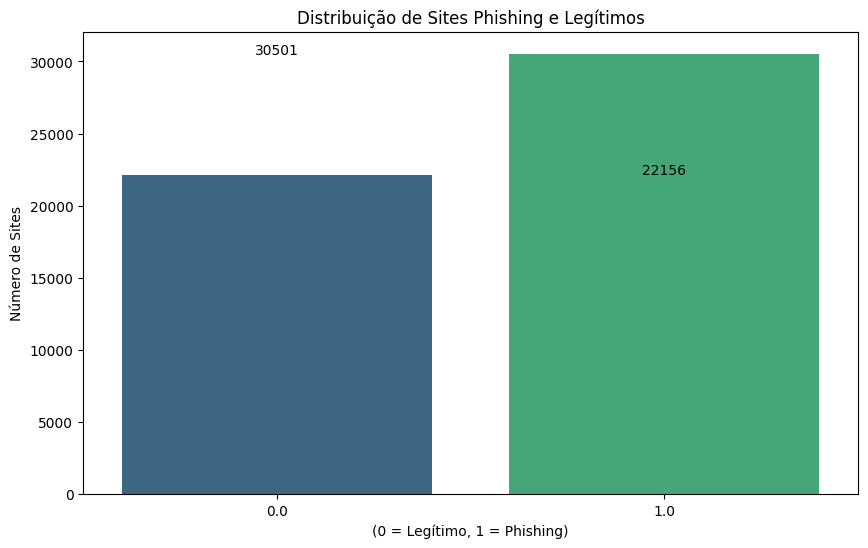

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar a existência da coluna 'label'
if 'label' not in df.columns:
    raise ValueError("A coluna 'label' não está presente no DataFrame.")

# Contar o número de sites phishing e legítimos
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts, x='label', y='count', hue='label', palette='viridis', dodge=False, legend=False)

# Adicionar títulos e rótulos
plt.title('Distribuição de Sites Phishing e Legítimos')
plt.xlabel('(0 = Legítimo, 1 = Phishing)')
plt.ylabel('Número de Sites')

# Adicionar rótulos de contagem nas barras
for i in range(len(label_counts)):
    plt.text(x=i, y=label_counts['count'][i] + 0.5, s=label_counts['count'][i], ha='center')

plt.show()


# Valores Únicos das colunas

In [107]:
# Identificar as linhas com valores nulos
linhas_com_nulos = df[df.isnull().any(axis=1)]

# Obter os índices dessas linhas
indices_para_eliminar = linhas_com_nulos.index.tolist()

# Imprimir os índices das linhas para eliminar
print("Índices das linhas com valores nulos:", indices_para_eliminar)

# Eliminar as linhas com valores nulos
df = df.dropna()

# Verificar o DataFrame limpo
print(df_limpo)

# Exibir os tipos de dados de cada coluna
tipos_de_dados = df.dtypes

print("Tipos de dados de cada coluna no dataset:")
print(tipos_de_dados)

Índices das linhas com valores nulos: [0, 212, 401, 458, 506, 629, 939, 1093, 1205]
                                                  URL  URLLength  \
1                            https://www.uni-mainz.de       23.0   
2                      https://www.voicefmradio.co.uk       29.0   
3                         https://www.sfnmjournal.com       26.0   
4                  https://www.rewildingargentina.org       33.0   
5                     https://www.globalreporting.org       30.0   
...                                               ...        ...   
52661                   https://www.cclpworldwide.com       28.0   
52662  https://cool-bush-57b9.kosaci4411.workers.dev/       46.0   
52663                            http://www.jerode.cf       19.0   
52664                       http://www.rajhibuild.com       25.0   
52665                         https://www.motivity.ru       22.0   

                                      Domain  DomainLength  IsDomainIP  TLD  \
1                   

# Análise gráfica

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo de plot para comparar uma característica específica entre phishing e legítimos
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='URLLength', data=df)
plt.title('Distribuição do Comprimento da URL entre Sites de Phishing e Legítimos')
plt.xlabel('(0 = Legítimo, 1 = Phishing)')
plt.ylabel('Comprimento da URL')
plt.show()

# Analisar mais características
for column in numeric_columns:
    if column in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='label', y=column, data=df)
        plt.title(f'Distribuição de {column} entre Sites de Phishing e Legítimos')
        plt.xlabel('(0 = Legítimo, 1 = Phishing)')
        plt.ylabel(column)
        plt.show()




ValueError: Could not interpret value `label` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

# Matriz de correlação

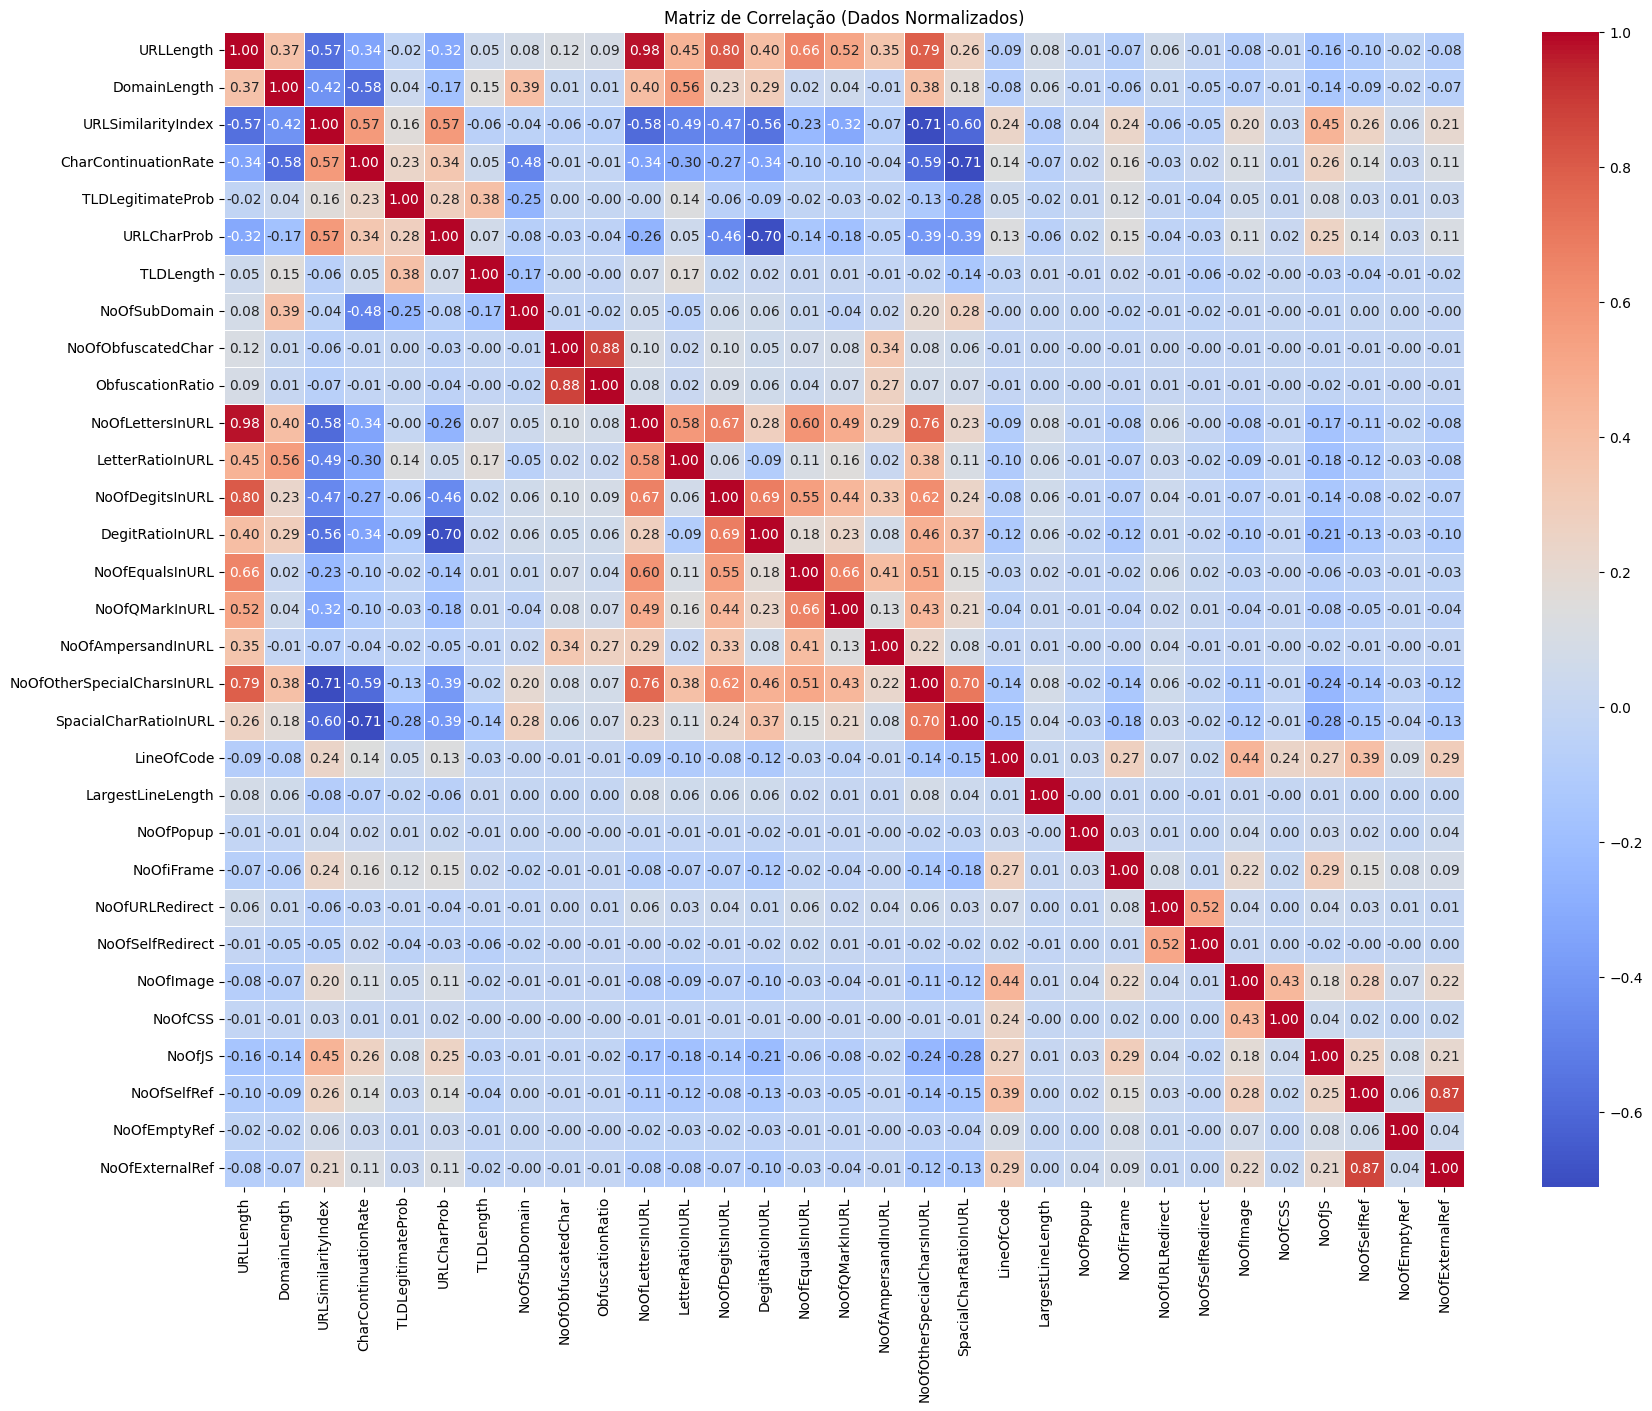

<Figure size 640x480 with 0 Axes>

In [115]:

from sklearn.preprocessing import StandardScaler
import os

# Lista de colunas numéricas que podem ser relevantes para análise de phishing
numeric_columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 
    'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 
    'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 
    'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 
    'LineOfCode', 'LargestLineLength', 'NoOfPopup', 'NoOfiFrame', 'NoOfURLRedirect', 
    'NoOfSelfRedirect', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
    'NoOfEmptyRef', 'NoOfExternalRef'
]

# Filtrar o DataFrame para incluir apenas as colunas numéricas
numeric_df = df[numeric_columns]

# Normalizar os dados
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_df)

# Converter os dados normalizados de volta para um DataFrame
df = pd.DataFrame(normalized_data, columns=numeric_columns)

# Calcular a matriz de correlação
correlation_matrix = df.corr()


# Plotar a matriz de correlação como um mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação (Dados Normalizados)')
plt.show()




# Remoção de colunas com alta 

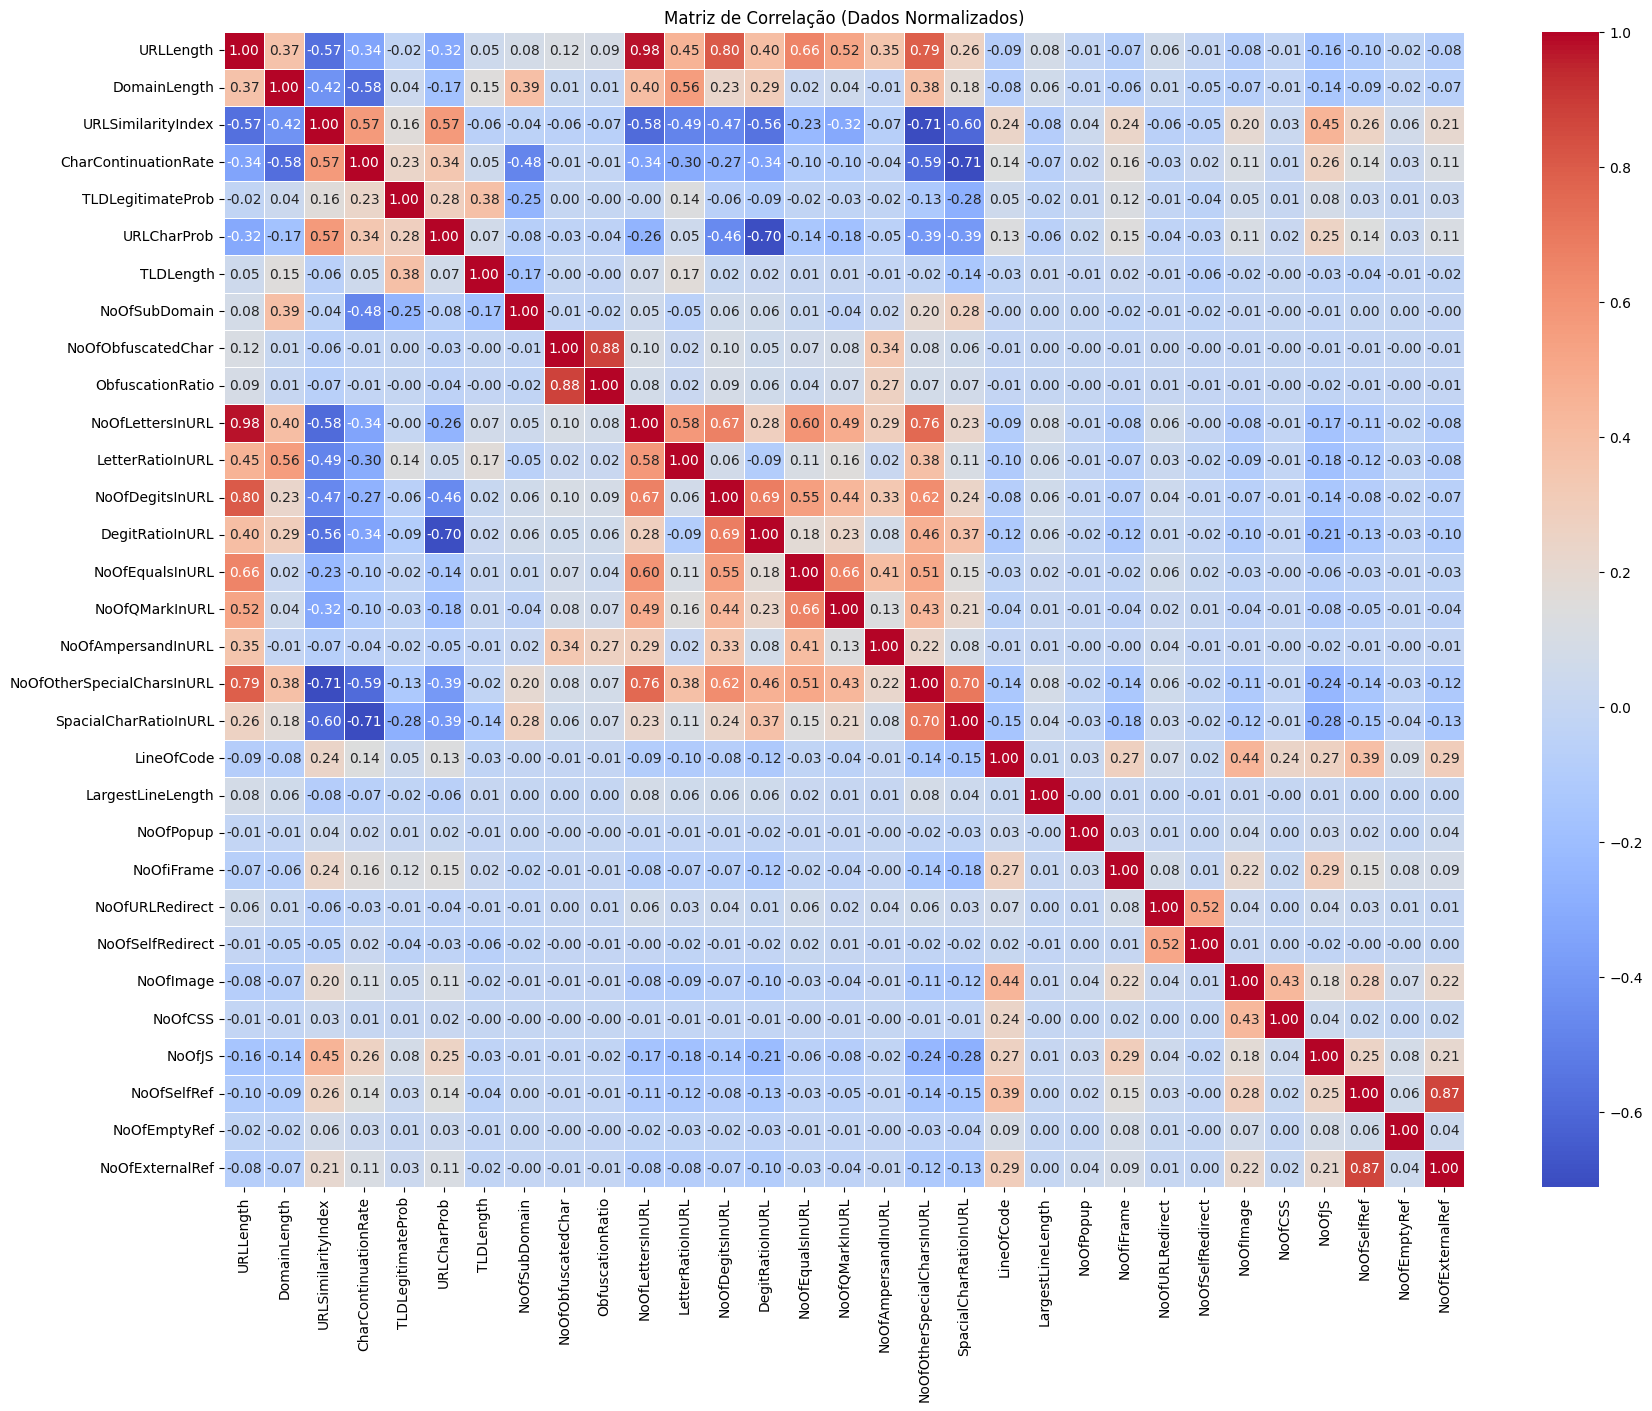

URLLength                     float64
DomainLength                  float64
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                     float64
NoOfSubDomain                 float64
NoOfObfuscatedChar            float64
ObfuscationRatio              float64
NoOfLettersInURL              float64
LetterRatioInURL              float64
NoOfDegitsInURL               float64
DegitRatioInURL               float64
NoOfEqualsInURL               float64
NoOfQMarkInURL                float64
NoOfAmpersandInURL            float64
NoOfOtherSpecialCharsInURL    float64
SpacialCharRatioInURL         float64
LineOfCode                    float64
LargestLineLength             float64
NoOfPopup                     float64
NoOfiFrame                    float64
NoOfURLRedirect               float64
NoOfSelfRedirect              float64
NoOfImage                     float64
NoOfCSS     

In [110]:

colunas_para_remover = [
    'LetterRatioInURL',  # Altamente correlacionada com NoOfLettersInURL
    'DomainLength',      # Altamente correlacionada com URLLength
    'LetterRatioInURL',  # Altamente correlacionada com NoOfObfuscatedChar
]

df_reduzido = df.drop(columns=colunas_para_remover)

# Normalizar os dados
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_df)

# Converter os dados normalizados de volta para um DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# Calcular a matriz de correlação
correlation_matrix = normalized_df.corr()

# Plotar a matriz de correlação como um mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação (Dados Normalizados)')
plt.show()

print(df.dtypes)